<a href="https://colab.research.google.com/github/gmelaku/Assignment1/blob/master/MP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIS 731 ZA: Programming Techniques for Data Science and Analytics
## Spring 2020
# Homework 7 of 12: Machine Problem

> Indented block


## Classification using PySpark & SciKit-Learn (sklearn)



The purpose of this homework is to develop/exercise your knowledge of the PySpark DataFrame
or a Panda DataFrame by having you do filtering on a real data science data set and use it further
for a classification using Sklearn in python.
Include your name in all your submissions (within the text of the file as a header comment). Turn
in an archive consisting of: your source code in an .ipynb file; a screenshot of the required
result.

#Import the necessary pyspark related dependecies 

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz

# !tar -xvf /content/spark-2.4.5-bin-hadoop2.7.tgz
!tar -xvf  spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

import findspark
findspark.init()

# Create a blank SparkContext
from pyspark import SparkContext
sc = SparkContext()

# 1. Loading data. 
Load the training (adult.data) and test dataset (adult.test) files using a PySpark RDD or DataFrame.

1(a) Load the Adult.data (train.data)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


1(b) Load test data set

In [4]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


# Import sqlContext

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Create DataFrame from the csv file imported

In [0]:
train = spark.read.csv('adult.csv', header = True,inferSchema = True)

In [0]:
test = spark.read.csv('test.csv', header = True,inferSchema = True)

# Print Schemas to see if the data is properly loaded

In [25]:
train.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- education-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- salary: string (nullable = true)



In [26]:
test.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Id: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- education_num: integer (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: integer (nullable = true)
 |-- capital_loss: integer (nullable = true)
 |-- hr_per_week: integer (nullable = true)
 |-- native_country: string (nullable = true)



# Check the number of rows

In [28]:
train.count(), test.count()

(32561, 16281)

# 2. Discretization

2(a) find the unique values (N unique values) in non-numeric column

In [35]:
workclass = train.select('workclass').distinct()
workclass.show()

+-----------------+
|        workclass|
+-----------------+
|        State-gov|
|      Federal-gov|
| Self-emp-not-inc|
|        Local-gov|
|          Private|
|                ?|
|     Self-emp-inc|
|      Without-pay|
|     Never-worked|
+-----------------+



In [0]:
import pandas as pd
import numpy as np



In [0]:
train_df = train.select("*").toPandas()

Map the workclass into numeric

In [36]:
education = train.select('education').distinct()
education.show()

+-------------+
|    education|
+-------------+
|  Prof-school|
|         10th|
|      7th-8th|
|      5th-6th|
|   Assoc-acdm|
|    Assoc-voc|
|      Masters|
|         12th|
|    Preschool|
|          9th|
|    Bachelors|
|    Doctorate|
|      HS-grad|
|         11th|
| Some-college|
|      1st-4th|
+-------------+



In [37]:
maritalstatus = train.select('marital-status').distinct()
maritalstatus.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 59
+--------------------+
|      marital-status|
+--------------------+
|             Widowed|
| Married-spouse-a...|
|   Married-AF-spouse|
|  Married-civ-spouse|
|            Divorced|
|       Never-married|
|           Separated|
+--------------------+



In [38]:
occupation = train.select('occupation').distinct()
occupation.show()

+------------------+
|        occupation|
+------------------+
|   Farming-fishing|
| Handlers-cleaners|
|    Prof-specialty|
|      Adm-clerical|
|   Exec-managerial|
|      Craft-repair|
|             Sales|
|                 ?|
|      Tech-support|
|  Transport-moving|
|   Protective-serv|
|      Armed-Forces|
| Machine-op-inspct|
|     Other-service|
|   Priv-house-serv|
+------------------+



In [39]:
relationship = train.select('relationship').distinct()
relationship.show()

+---------------+
|   relationship|
+---------------+
|        Husband|
|      Own-child|
|  Not-in-family|
| Other-relative|
|           Wife|
|      Unmarried|
+---------------+



In [40]:
race = train.select('race').distinct()
race.show()

+-------------------+
|               race|
+-------------------+
| Asian-Pac-Islander|
|              Black|
|              Other|
|              White|
| Amer-Indian-Eskimo|
+-------------------+



In [41]:
sex = train.select('sex').distinct()
sex.show()

+-------+
|    sex|
+-------+
|   Male|
| Female|
+-------+



In [42]:
country = train.select('country').distinct()
country.show()

+-------------------+
|            country|
+-------------------+
| Dominican-Republic|
|            Ireland|
|               Cuba|
|          Guatemala|
|               Iran|
|             Taiwan|
|        El-Salvador|
|      United-States|
|              South|
|              Japan|
|          Nicaragua|
|             Canada|
|           Cambodia|
|               Laos|
|            Germany|
|    Trinadad&Tobago|
|               Peru|
|            Ecuador|
|         Yugoslavia|
|            Vietnam|
+-------------------+
only showing top 20 rows



In [43]:
salary = train.select('salary').distinct()
salary.show()

+------+
|salary|
+------+
|  >50K|
| <=50K|
+------+



##  Change non-numeric values into Numeric

Training Data

In [53]:
def handle_non_numerical_data(train_df):
  columns = train_df.columns.values
  for column in columns:
    text_digit_vals = {}
    def convert_to_int(val):
      return text_digit_vals[val]

    if train_df[column].dtype != np.int64 and train_df[column].dtype != np.float64:
      column_contents = train_df[column].values.tolist()
      unique_elements = set(column_contents)
      x = 0
      for unique in unique_elements:
        if unique not in text_digit_vals:
          text_digit_vals[unique] = x
          x+=1

      train_df[column] = list(map(convert_to_int, train_df[column]))

  return train_df

train_df = handle_non_numerical_data(train_df)
print(train_df.head())

   age  workclass  fnlwgt  ...  hours-per-week  country  salary
0   22          2    8010  ...              39       22       1
1   33          8   11820  ...              12       22       1
2   21          4   12679  ...              39       22       1
3   36          4    3602  ...              39       22       1
4   11          4    7158  ...              39       38       1

[5 rows x 15 columns]


Test Data

In [63]:
def handle_non_numerical_data(test_df):
  columns = test_df.columns.values
  for column in columns:
    text_digit_vals = {}
    def convert_to_int(val):
      return text_digit_vals[val]

    if test_df[column].dtype != np.int64 and test_df[column].dtype != np.float64:
      column_contents = test_df[column].values.tolist()
      unique_elements = set(column_contents)
      x = 0
      for unique in unique_elements:
        if unique not in text_digit_vals:
          text_digit_vals[unique] = x
          x+=1

      test_df[column] = list(map(convert_to_int, test_df[column]))

  return test_df

test_df = handle_non_numerical_data(test_df)
print(test_df.head())

   _c0     Id  age  ...  capital_loss  hr_per_week  native_country
0    0  14015    8  ...             0           39               1
1    1   6176   21  ...             0           49               1
2    2  14519   11  ...             0           39               1
3    3  10333   27  ...             0           39               1
4    4  15222    1  ...             0           29               1

[5 rows x 16 columns]


# 3. Removing missing data. 
Use PySpark RDD or Dataframes to filter all entries with any missing values from both sets (both train and test sets). Missing values are denoted
as “?” in the input dataset files.

Removing missing values from test dataframe

In [56]:
test= test.dropna()
test.head(5)

[Row(_c0=1, Id='A32562', age=25, workclass='Private', fnlwgt=226802, education='11th', education_num=7, marital_status='Never-married', occupation='Machine-op-inspct', relationship='Own-child', race='Black', sex='Male', capital_gain=0, capital_loss=0, hr_per_week=40, native_country='United-States'),
 Row(_c0=2, Id='A32563', age=38, workclass='Private', fnlwgt=89814, education='HS-grad', education_num=9, marital_status='Married-civ-spouse', occupation='Farming-fishing', relationship='Husband', race='White', sex='Male', capital_gain=0, capital_loss=0, hr_per_week=50, native_country='United-States'),
 Row(_c0=3, Id='A32564', age=28, workclass='Local-gov', fnlwgt=336951, education='Assoc-acdm', education_num=12, marital_status='Married-civ-spouse', occupation='Protective-serv', relationship='Husband', race='White', sex='Male', capital_gain=0, capital_loss=0, hr_per_week=40, native_country='United-States'),
 Row(_c0=4, Id='A32565', age=44, workclass='Private', fnlwgt=160323, education='Some

Removing missing values from train dataframe

In [58]:
train = train.dropna()
train.head(5)

[Row(age=39, workclass=' State-gov', fnlwgt=77516, education=' Bachelors', education-num=13, marital-status=' Never-married', occupation=' Adm-clerical', relationship=' Not-in-family', race=' White', sex=' Male', capital-gain=2174, capital-loss=0, hours-per-week=40, country=' United-States', salary=' <=50K'),
 Row(age=50, workclass=' Self-emp-not-inc', fnlwgt=83311, education=' Bachelors', education-num=13, marital-status=' Married-civ-spouse', occupation=' Exec-managerial', relationship=' Husband', race=' White', sex=' Male', capital-gain=0, capital-loss=0, hours-per-week=13, country=' United-States', salary=' <=50K'),
 Row(age=38, workclass=' Private', fnlwgt=215646, education=' HS-grad', education-num=9, marital-status=' Divorced', occupation=' Handlers-cleaners', relationship=' Not-in-family', race=' White', sex=' Male', capital-gain=0, capital-loss=0, hours-per-week=40, country=' United-States', salary=' <=50K'),
 Row(age=53, workclass=' Private', fnlwgt=234721, education=' 11th',

# 4. Change the spark Data Frame into Pandas

In [61]:
train_df = train.select("*").toPandas()
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
test_df = test.select("*").toPandas()
test_df.head()

,_c0,Id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,native_country
0,1,A32562,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,2,A32563,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,3,A32564,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,4,A32565,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,5,A32566,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


See if the count of rows is changed after missing values are removed.

In [59]:
train.count(), test.count()

(32561, 16281)

In [67]:

test_df.head(5)

,Id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,native_country
0,14015,8,7,11734,14,6,0,3,3,1,1,0,0,39,1
1,6176,21,7,9526,9,8,4,5,2,4,1,0,0,49,1
2,14519,11,3,3735,3,11,4,2,2,4,1,0,0,39,1
3,10333,27,7,11370,8,9,4,3,2,1,1,2,0,39,1
4,15222,1,0,2118,8,9,0,1,3,4,0,0,0,29,1


In [70]:
def handle_non_numerical_data(train_df):
  columns = train_df.columns.values
  for column in columns:
    text_digit_vals = {}
    def convert_to_int(val):
      return text_digit_vals[val]

    if train_df[column].dtype != np.int64 and train_df[column].dtype != np.float64:
      column_contents = train_df[column].values.tolist()
      unique_elements = set(column_contents)
      x = 0
      for unique in unique_elements:
        if unique not in text_digit_vals:
          text_digit_vals[unique] = x
          x+=1

      train_df[column] = list(map(convert_to_int, train_df[column]))

  return train_df

train_df = handle_non_numerical_data(train_df)
print(train_df.head())

   age  workclass  fnlwgt  ...  hours-per-week  country  salary
0   22          2    8010  ...              39       22       1
1   33          8   11820  ...              12       22       1
2   21          4   12679  ...              39       22       1
3   36          4    3602  ...              39       22       1
4   11          4    7158  ...              39       38       1

[5 rows x 15 columns]


## 5. Training logistic regression. 
Train a Logistic Regression classifier in sklearn
using your filtered training set as represented using Pandas DataFrames (using X_train
and Y_train).

Define X_train and Y_train

In [71]:
X_train = train_df[1:14]
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
1,33,8,11820,1,12,5,6,2,0,0,0,0,12,22,1
2,21,4,12679,0,8,0,12,4,0,0,0,0,39,22,1
3,36,4,3602,9,6,5,12,2,1,0,0,0,39,22,1
4,11,4,7158,1,12,5,7,5,1,1,0,0,39,38,1
5,20,4,14924,13,13,5,6,5,0,1,0,0,39,22,1


In [73]:
Y_train = train_df['salary']
Y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: salary, dtype: int64

# Import SciKit Learn Library

In [78]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Train the model

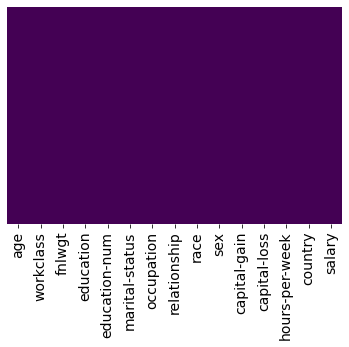

In [79]:
sns.heatmap(X_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('salary',axis=1), 
           train_df['salary'], test_size=0.30, 
            random_state=101) 

#Creating the model

In [83]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 ## 6. Classification. 
Obtain the predictions (Y_pred) on X_test using trained classifier.
Evaluate the trained classifier in terms of Precision, Recall, and F1-score. Print these out
for both classes on the filtered test set DataFrame (Panda) using Y_test and Y_pred.

#Prediction 

In [0]:
Predictions = model.predict(X_test)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.49      0.18      0.26      2333
           1       0.78      0.94      0.86      7436

    accuracy                           0.76      9769
   macro avg       0.64      0.56      0.56      9769
weighted avg       0.71      0.76      0.71      9769



## 7 Model evaluation. 
Calculate and print the accuracy of the classifier on the test set using Y_test and Y_pred.

In [89]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

[[ 413 1920]
 [ 437 6999]]


Calculate the accuracy from True positive and True Negative

In [94]:
Accuracy = (413+6999)/(413+6999+1920+437)
print(Accuracy)

0.7587265840925376


## 8. Receiver Operating Characteristic (ROC) curve. 
Generate and print out the ROC curve using Y_test and Y_pred. (You may just print values rather than plot the result graphically.)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.736


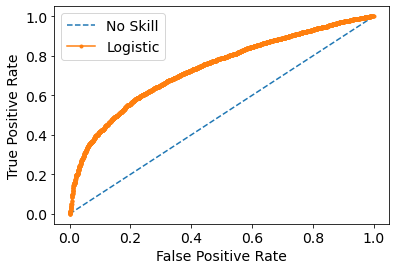

In [100]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()